# **AAI614: Data Science & its Applications**
# Graded Assessment: Project 1
---
*Mostafa Zein al Abidine - 201201495*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mostafa-zea/AAI614_-zeinalabidine-/blob/main/AAI_614O_Project1_Mostafa_Z.ipynb)


In [1]:
import pandas as pd
import numpy as np

columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]

df = pd.read_csv("https://raw.githubusercontent.com/mostafa-zea/AAI614_-zeinalabidine-/main/adult.data",
                 header=None, names=columns, skipinitialspace=True)

## Data exploration

### 1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The columns were correctly imported, and their data types match the descriptions in the text file `adult.names`

- Continuous/numeric features were correctly recognized as `int64`

- Categorical features were correctly recognized as `object` (string)

The `income` column which contains comparison values `<=50K` and `>50K`, is currently recognized as an object/string. It will have to be converted to a numeric representation when performing the regression task.


---

### 2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [4]:
df.replace("?", np.nan, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
missing_values=df.isna().sum()
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Missing values are represented as `"?"` in the data

Reading the data file with the parameter `skipinitialspace=True` ensured that values like `" ?"` (which do appear in the data file) were interpreted as `"?"`

Missing values were then cast to `np.nan` using `df.replace("?", np.nan, inplace=True)`

Counting the missing values in each column shows that they appear in the following features as follows:

- `workclass`: 1,836 missing values  
- `occupation`: 1,843 missing values  
- `native_country`: 583 missing values  

This matches the description on the dataset's source website




---

### 3. Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

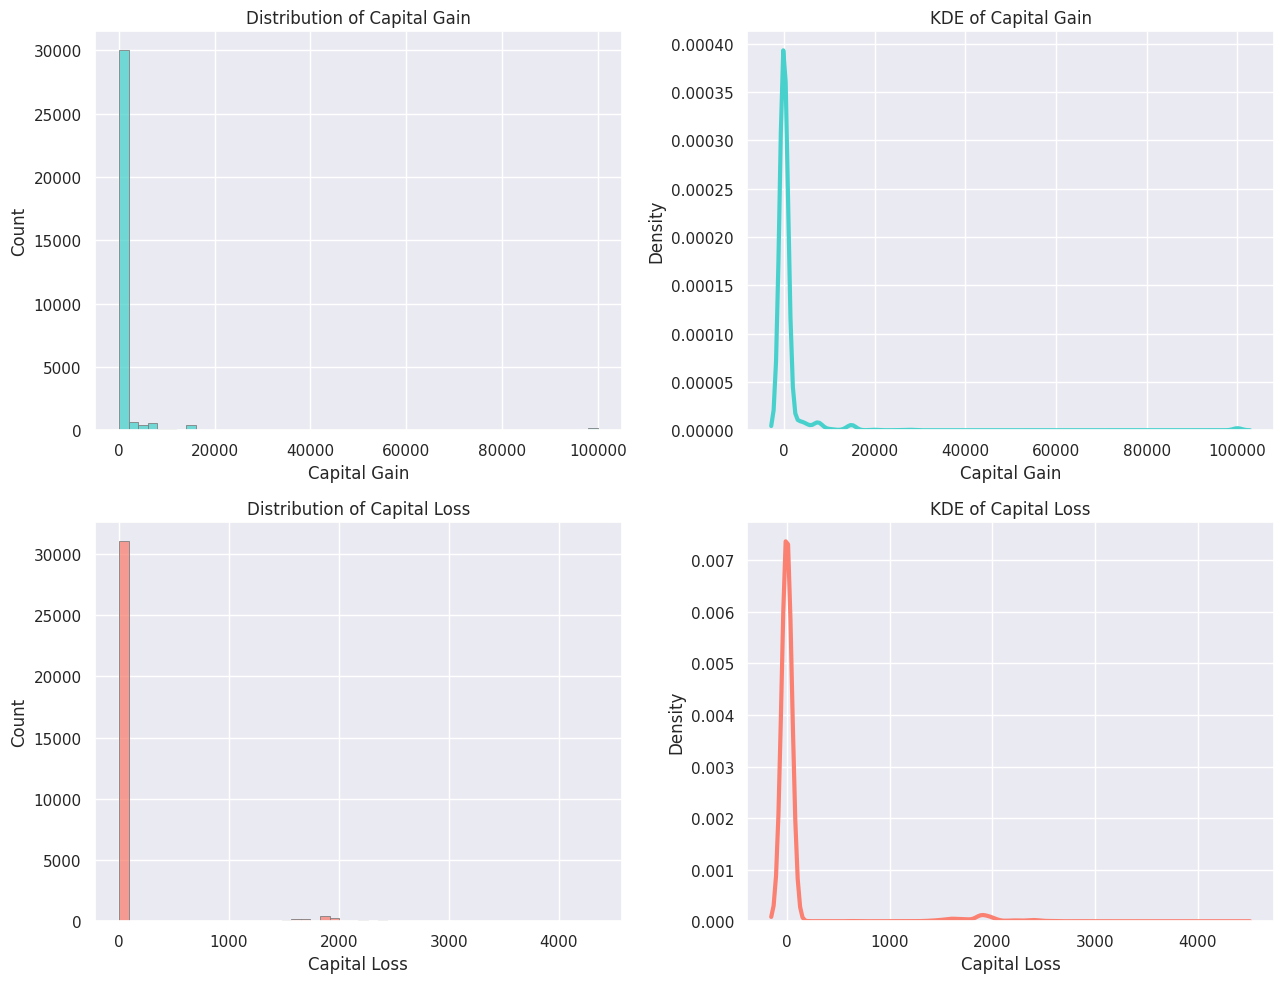

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['capital_gain'], bins=50, color='mediumturquoise', edgecolor='gray')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(df['capital_loss'], bins=50, color='salmon', edgecolor='gray')
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.kdeplot(df['capital_gain'], color='mediumturquoise', linewidth=3)
plt.title('KDE of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.kdeplot(df['capital_loss'], color='salmon', linewidth=3)
plt.title('KDE of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Yes, it would be better if `capital_gain` and `capital_loss` were tranfromed into categorical variables.

The plots are extremely right-skewed, which shows that the vast majority of values are zero, with relatively very few large/non-zero values.

The non-zero values are sparse with very low counts, it would be better to regard them as a single category.

In [8]:
df['capital_gain_cat'] = df['capital_gain'].apply(lambda x: 'has_gain' if x > 0 else 'no_gain')
df['capital_loss_cat'] = df['capital_loss'].apply(lambda x: 'has_loss' if x > 0 else 'no_loss')

In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_cat,capital_loss_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,has_gain,no_loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no_gain,no_loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no_gain,no_loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no_gain,no_loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no_gain,no_loss


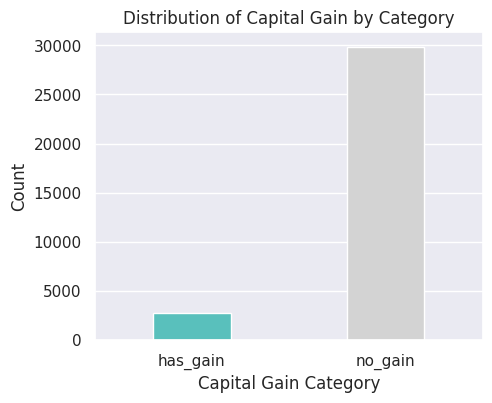

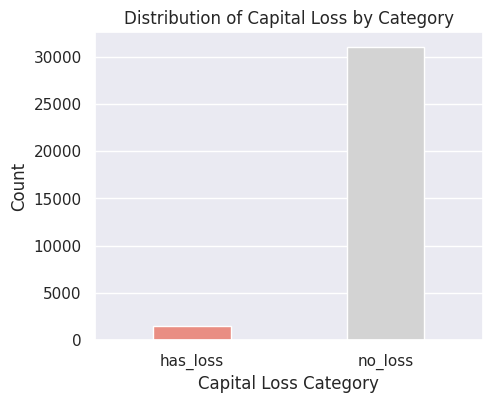

In [10]:
plt.figure(figsize=(5, 4))
sns.countplot(x='capital_gain_cat', hue='capital_gain_cat', data=df, order=['has_gain', 'no_gain'],
              palette={'has_gain': 'mediumturquoise', 'no_gain': 'lightgray'}, width=0.4)
plt.title('Distribution of Capital Gain by Category')
plt.xlabel('Capital Gain Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(x='capital_loss_cat', hue='capital_loss_cat', data=df, order=['has_loss', 'no_loss'],
              palette={'has_loss': 'salmon', 'no_loss': 'lightgray'}, width=0.4)
plt.title('Distribution of Capital Loss by Category')
plt.xlabel('Capital Loss Category')
plt.ylabel('Count')
plt.show()


---

### 4. The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.

### 5. Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.

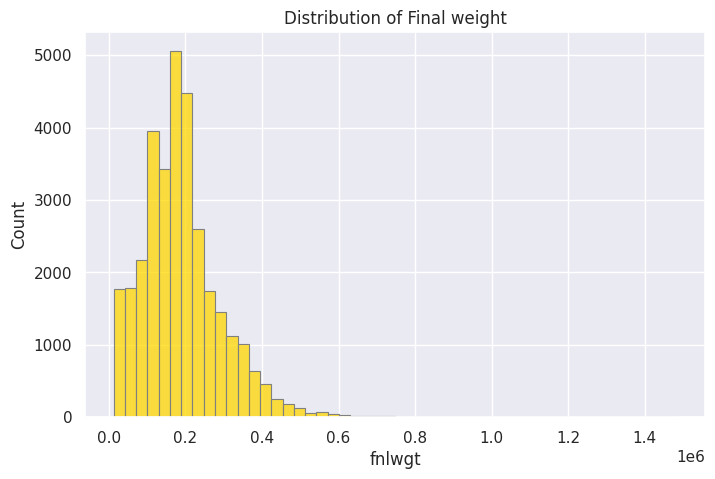

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['fnlwgt'], bins=50, color='gold', edgecolor='gray')
plt.title('Distribution of Final weight')
plt.xlabel('fnlwgt')
plt.ylabel('Count')
plt.show()

In [12]:
df['fnlwgt'].describe()

,fnlwgt
count,3.256100e+04
mean,1.897784e+05
std,1.055500e+05
min,1.228500e+04
25%,1.178270e+05
50%,1.783560e+05
75%,2.370510e+05
max,1.484705e+06


Both the plot and numeric exploration show that the `fnlwgt` variable is NOT symmetrically distributed. It is right-skewed, most individuals have lower sampling weights, and few have very high weights

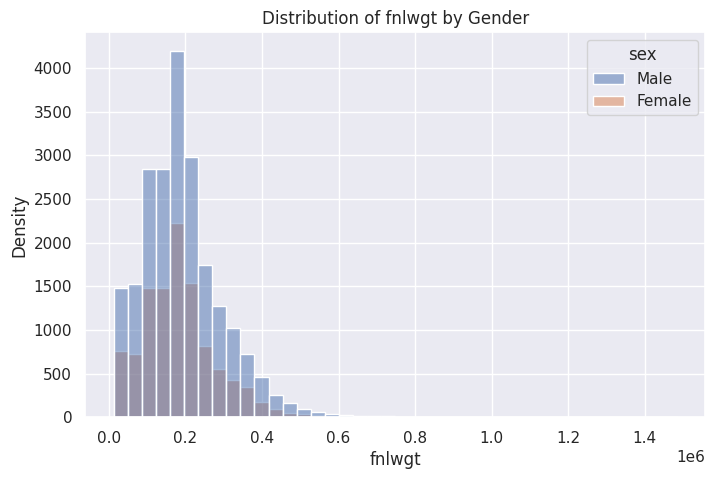

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='fnlwgt', hue='sex', bins=40)
plt.title('Distribution of fnlwgt by Gender')
plt.xlabel('fnlwgt')
plt.ylabel('Density')
plt.show()

The histograms comparing the distribution of `fnlwgt` by gender reveal 2 observations:

1. The overall shape of the distribution is almost identical for both males and females (right-skewed, increasing, peaking, and decreasing similarly at the same `fnlwgt` ranges). This suggests that the pattern/trend of sampling weights is consistent for both genders.
2.   The hight of the bars for males is consistently heigher, which indicates that there are simply more males individuals in the dataset.

We can conclude that the distributions are similarly shaped, and they differ in frequency not pattern.


In [14]:
threshold = df['fnlwgt'].quantile(0.99)

In [15]:
df.loc[df['fnlwgt'] > threshold,'fnlwgt'] = np.nan

I chose to treat extreme values in `fnlwgt` as outliers. Most individuals in the dataset have sampling weights ranging between 12,000 and 400,000 with a significat majority peaking between 150,000 and 250,000. This is why I considered values approaching 1,000,000 (which are well outside the typical range) as extreme.

I replaced the highest 1% of `fnlwgt` values (325 enties) with missing values (NaN). While this is a small portion of the data, these extreme and few outliers may distort the scale of the feature in further analysis.


In [16]:
original_count = df.shape[0]
after_removal = df['fnlwgt'].notna().sum()
print(f"{original_count - after_removal} extreme values were removed (1% of the sampling weights).")

325 extreme values were removed (1% of the sampling weights).


In [17]:
df['fnlwgt'].describe()

,fnlwgt
count,32236.00000
mean,185289.50760
std,94900.04477
min,12285.00000
25%,117500.50000
50%,177473.50000
75%,234634.75000
max,510072.00000



---

## Correlation

### Find the correlations between age, education_num, and hours_per_week.

### 1. Do any of the variables appear to be correlated? How did you make your assessment?

In [18]:
df[['age', 'education_num', 'hours_per_week']].corr()

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


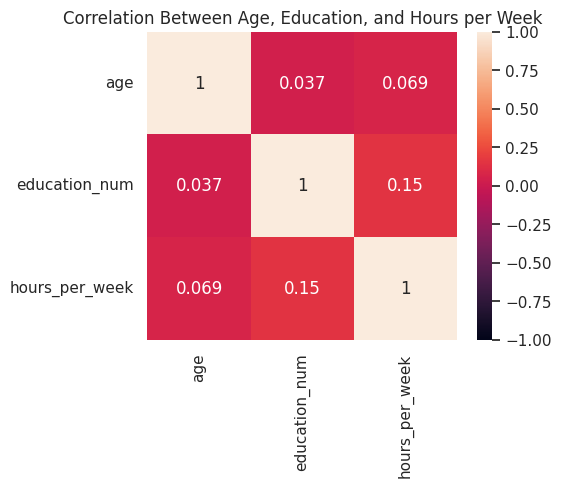

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['age', 'education_num', 'hours_per_week']].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Between Age, Education, and Hours per Week')
plt.show()

The correlation analysis shows:

- `education_num` and `hours_per_week` have the strongest positive correlation, (0.15). This suggests that individuals with more education tend to work slightly more hours per week.

- `age` and `hours_per_week` have a weak positive correlation (0.069). This suggests a minimal relationship between age and work hours per week.

- `age` and `education_num` are almost uncorrelated (0.037).

However, none of the variables are strongly correlated (all 3three are closer to 0 than +1).



---


### 2. Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?

In [24]:
from scipy.stats import pearsonr

r, p = pearsonr(df['education_num'], df['hours_per_week'])

print(f"Correlation coefficient: {r}")
print(f"P-value: {p}")

Correlation coefficient: 0.14812273262291162
P-value: 4.236647479009747e-159


Testing the correlation between `education_num` and `hours_per_week` using Pearsons correlation test:

r = 0.15

p-value: extremely small (p ≈ 4.2 × 10⁻¹⁵⁹)

Since p-value < 0.05 (significantly), Then the correlation is statistically significant.

Although the correlation coefficient (r) is weak (0.15), p-value still suggests that individuals with more education tend to work slightly more hours per week.

This is consistent with the previous findings as expected.


---

### 3. How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?

In [27]:
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']

r_male, p_male = pearsonr(df_male['education_num'], df_male['age'])
print(f"Male - Correlation coefficient: {r_male}")
print(f"Male - P-value: {p_male}")

r_female, p_female = pearsonr(df_female['education_num'], df_female['age'])
print(f"Female - Correlation coefficient: {r_female}")
print(f"Female - P-value: {p_female}")

Male - Correlation coefficient: 0.06048640919826828
Male - P-value: 4.022986830139681e-19
Female - Correlation coefficient: -0.0178992439354477
Female - P-value: 0.06322895030880603


The correlation between `education_num` and `age` for males (r ≈ 0.06, p < 0.05) suggests that there is a **weak but statistically significant** tendency for `education_num` to increase with `age`.

The correlation between `education_num` and `age` for females (r ≈ -0.018, p >= 0.05) suggests that there is a **no correlation and no statistical significance** between `education_num` and `age`.

This could be expected since the dataset is from 1994, and might reflect historical or societal trends pf the time.



---


### 4. Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?

In [29]:
df[['education_num', 'hours_per_week']].cov()

,education_num,hours_per_week
education_num,6.618890,4.705338
hours_per_week,4.705338,152.458995


While not high, the positive covariance (4.7) suggests a positive relationship between `education_num` and `hours_per_week`. As `education_num` increases `hours_per_week`increse as well. This supports the previous correlation findings.